Goal: use a decision tree model to predict the relaxed energy of catalysts. 

Pipeline:
- data inspection & cleaning
- hot encoding (not all features are numeric) 
- correlation analysis (feature reduction) ??
- principal component analysis (for visualization) ??
- cross validation
- hyperparameter tuning & model selection
- final model evaluation
- feature importance
- exploitation

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df_h = pd.read_csv('data/training_FULL_h_all_featurized.csv')
df_no_ads = pd.read_csv('data/training_FULL_no_ads_all_featurized.csv')

print(df_h.shape)
print(df_no_ads.shape)

(1605, 487)
(14646, 487)


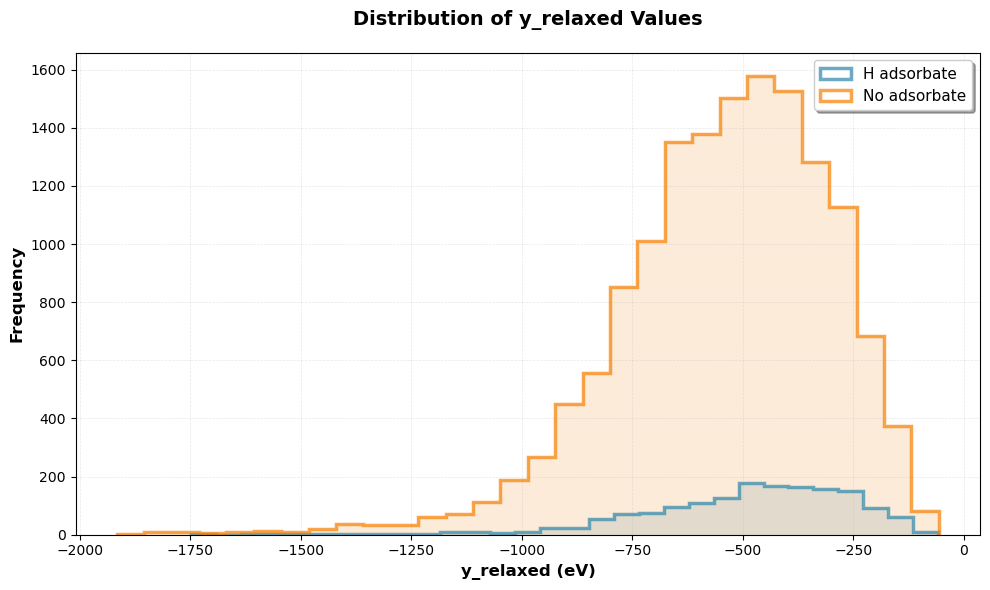

In [14]:
# Create figure with better size and resolution
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Plot histograms as step curves (no overlap issues)
ax.hist(df_h['y_relaxed'], bins=30, alpha=0.7, color='#2E86AB', label='H adsorbate', histtype='step', linewidth=2.5)
ax.hist(df_no_ads['y_relaxed'], bins=30, alpha=0.7, color='#F77F00', label='No adsorbate', histtype='step', linewidth=2.5)

# Optional: add fill under the lines for better visibility
ax.hist(df_h['y_relaxed'], bins=30, alpha=0.15, color='#2E86AB', histtype='stepfilled')
ax.hist(df_no_ads['y_relaxed'], bins=30, alpha=0.15, color='#F77F00', histtype='stepfilled')

ax.set_xlabel('y_relaxed (eV)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of y_relaxed Values', fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='upper right', frameon=True, shadow=True, fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [15]:
print(f"columns in h-ads dataset before: {df_h.shape[1]}")
print(f"columns in no-ads dataset before: {df_no_ads.shape[1]}")
print(f"rows in h-ads dataset before: {df_h.shape[0]}")
print(f"rows in no-ads dataset before: {df_no_ads.shape[0]}")

# get features (columns) with all NaN values
nan_cols_h = df_h.columns[df_h.isna().all()].tolist()
nan_cols_no_ads = df_no_ads.columns[df_no_ads.isna().all()].tolist()

# get features with all 0 values
h_num_cols = df_h.select_dtypes(include='number')
h_zero_cols = h_num_cols.columns[h_num_cols.eq(0).all()]

no_ads_num_cols = df_no_ads.select_dtypes(include='number')
no_ads_zero_cols = no_ads_num_cols.columns[no_ads_num_cols.eq(0).all()]

print("----")
print("Columns with all NaN values in h-ads dataset:", nan_cols_h)
print("Columns with all NaN values in no-ads dataset:", nan_cols_no_ads)
print("Columns with all 0 values in h-ads dataset:", h_zero_cols)
print("Columns with all 0 values in no-ads dataset:", no_ads_zero_cols)

# drop NaN columns
df_h_clean_col = df_h.drop(columns=nan_cols_h)
df_no_ads_clean_col = df_no_ads.drop(columns=nan_cols_no_ads)

# drop all-0 columns
df_h_clean_col = df_h_clean_col.drop(columns=h_zero_cols)
df_no_ads_clean_col = df_no_ads_clean_col.drop(columns=no_ads_zero_cols)

# drop rows with no structure data
df_h_clean = df_h_clean_col.dropna(subset=['structure'])
df_no_ads_clean = df_no_ads_clean_col.dropna(subset=['structure'])

print("----")
print(f"columns in h-ads dataset after cleaning: {df_h_clean.shape[1]}")
print(f"columns in no-ads dataset after cleaning: {df_no_ads_clean.shape[1]}")

print(f"rows in h-ads dataset after cleaning: {df_h_clean.shape[0]}")
print(f"rows in no-ads dataset after cleaning: {df_no_ads_clean.shape[0]}")

columns in h-ads dataset before: 487
columns in no-ads dataset before: 487
rows in h-ads dataset before: 1605
rows in no-ads dataset before: 14646
----
Columns with all NaN values in h-ads dataset: []
Columns with all NaN values in no-ads dataset: []
Columns with all 0 values in h-ads dataset: Index(['MagpieData minimum NdValence', 'MagpieData minimum NfValence',
       'MagpieData minimum NsUnfilled', 'MagpieData minimum NdUnfilled',
       'MagpieData minimum NfUnfilled', 'MagpieData mode NfUnfilled',
       'MagpieData minimum GSbandgap', 'MagpieData mode GSbandgap',
       'MagpieData minimum GSmagmom'],
      dtype='object')
Columns with all 0 values in no-ads dataset: Index(['MagpieData minimum NdValence', 'MagpieData minimum NfValence',
       'MagpieData minimum NsUnfilled', 'MagpieData minimum NdUnfilled',
       'MagpieData minimum NfUnfilled', 'MagpieData minimum GSbandgap',
       'MagpieData minimum GSmagmom'],
      dtype='object')
----
columns in h-ads dataset after clea

In [6]:
# separate dataframe into features, identifiers, and target
h_id = df_h_clean[['bulk_id', 'bulk_symbols', 'structure']]
h_y = df_h_clean['y_relaxed']
h_X = df_h_clean.drop(columns=['bulk_id', 'bulk_symbols', 'y_relaxed', 'structure'])

no_ads_id = df_no_ads_clean[['bulk_id', 'bulk_symbols', 'structure']]
no_ads_y = df_no_ads_clean['y_relaxed']
no_ads_X = df_no_ads_clean.drop(columns=['bulk_id', 'bulk_symbols', 'y_relaxed', 'structure'])

## Hot encode

need to do this for correlation analysis. Otherwise, decision tree models do not need hot-encoded datasets.

In [7]:
encoded_h_X = pd.get_dummies(h_X)
encoded_no_ads_X = pd.get_dummies(no_ads_X)

## Correlation Analysis

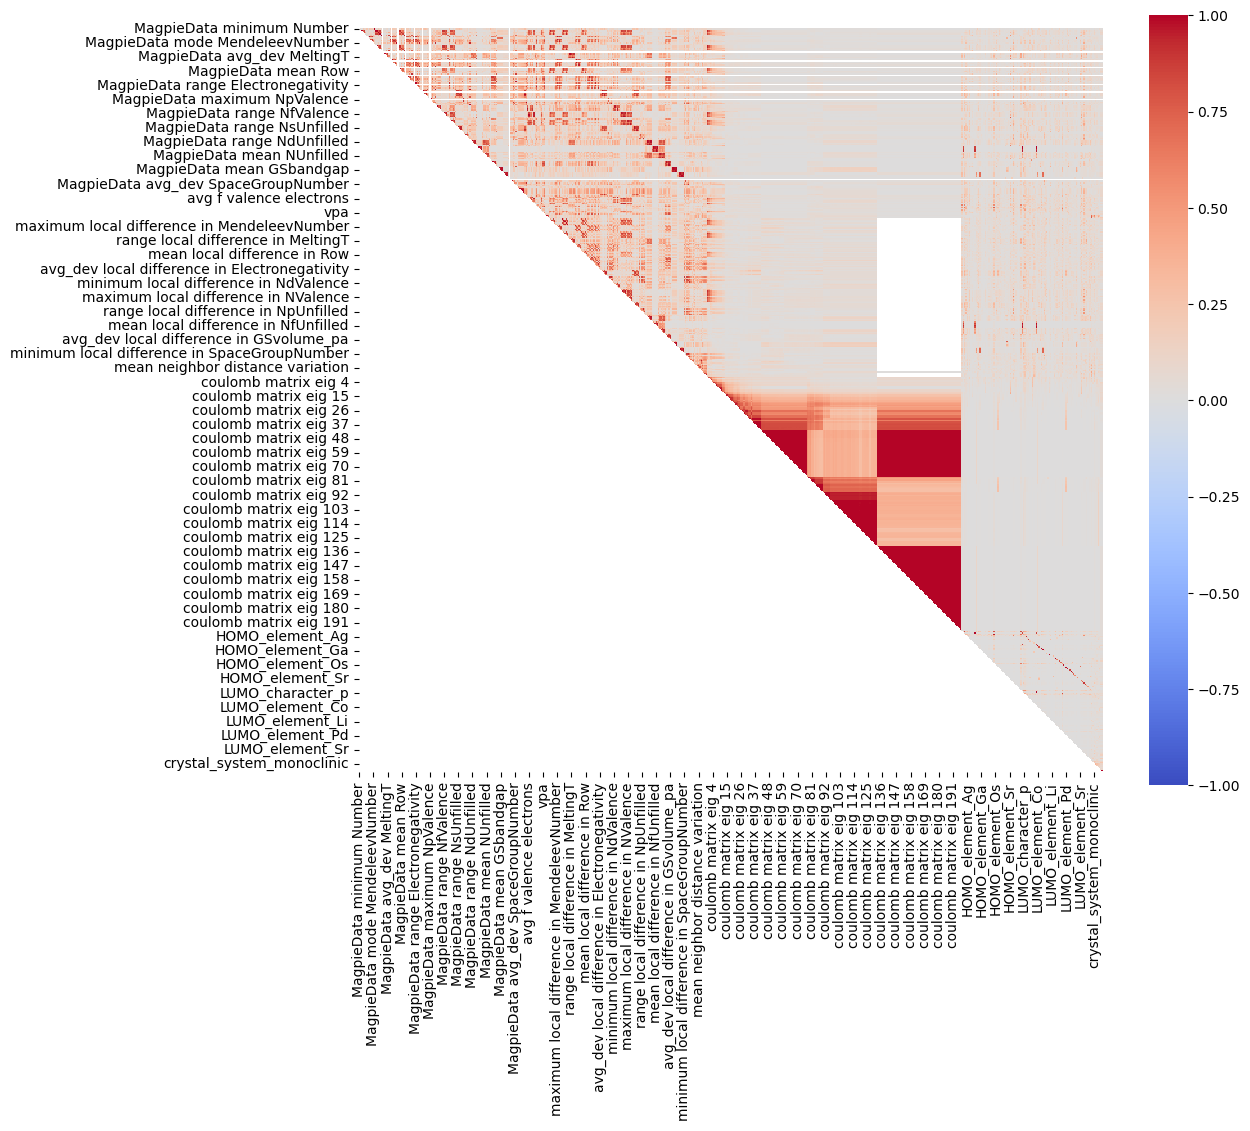

In [8]:
import seaborn as sns
import numpy as np

h_corr_mat = encoded_h_X.corr().abs()
upper_tri = h_corr_mat.where(np.triu(np.ones(h_corr_mat.shape), k=1).astype(bool)) 

plt.figure(figsize=(12, 10))
sns.heatmap(upper_tri, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)
plt.show()

*TO-DO:*

find a way to drop highly correlated features

In [47]:
high_corr_pairs = []
for column in upper_tri.columns:
    for row in upper_tri.index:
        if abs(upper_tri.loc[row, column]) > 0.9:
            high_corr_pairs.append((row, column, upper_tri.loc[row, column]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df = high_corr_df.sort_values(by="Correlation", key=abs, ascending=False)

high_corr_df

,Feature 1,Feature 2,Correlation
911,coulomb matrix eig 60,coulomb matrix eig 72,1.000000
834,coulomb matrix eig 67,coulomb matrix eig 69,1.000000
1595,MagpieData maximum NfUnfilled,LUMO_character_f,1.000000
1596,MagpieData range NfUnfilled,LUMO_character_f,1.000000
1606,MagpieData maximum NfUnfilled,LUMO_element_Ce,1.000000
...,...,...,...
95,MagpieData maximum CovalentRadius,MagpieData range GSvolume_pa,0.900700
93,MagpieData maximum CovalentRadius,MagpieData maximum GSvolume_pa,0.900700
96,MagpieData range CovalentRadius,MagpieData range GSvolume_pa,0.900700
94,MagpieData range CovalentRadius,MagpieData maximum GSvolume_pa,0.900700


## Cross Validation

Cross validate the dataset. 

simplest way is to use cross_val_score()
if cv argument is an integer, cross_val_score uses KFold or StratifiedKFold.
Can also use other cross alidation strategies by passing a cross validation iterator or by defining a custom iterable yielding (train, test) splits as arrays of indices.

For this task, I will simply use cross_val_score with a cv = 5 - 10.

In [ ]:
from sklearn.model_selection import train_test_split

h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(
    encoded_h_X, 
    h_y, 
    test_size=0.6, 
    random_state=1065)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

h_dt = DecisionTreeRegressor()
no_ads_dt = DecisionTreeRegressor()

param_grid = {
    'max_depth' : [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split' : [2, 4, 6, 8, 10, 12, 16, 18, 20],
    'min_samples_leaf' : [1, 2, 4, 5, 10, 15, 20],
    'max_features' : [None, 'sqrt', 'log2'],
}

grid = GridSearchCV(
    estimator=h_dt,
    param_grid = param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(h_X_train, h_y_train)
print('Best params: ', grid.best_params_)

best_model = grid.best_estimator_

scores = cross_val_score(best_model, h_X_train, h_y_train, cv=5, scoring='r2')
print(f'CV R^2 scores: {scores}')

Fitting 5 folds for each of 1323 candidates, totalling 6615 fits
Best params:  {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
CV r2 scores: [-1.17149343  0.20513506 -0.55552309 -2.97909533  0.1224875 ]


## Regression

Here I define the model pipeline that will be used for CV and final model evaluation.

In [ ]:
# hot-encodes the categorical structure features.
# this code is generated by ChatGPT and I am not sure exactly how it works
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# get the part of the dataframe that is obj data type (which is a string)
is_obj = h_X.dtypes == 'object'
h_X_obj = h_X.loc[:, is_obj]

# OneHotCoder transforms each categorical feature with (n_categories) possible values
# into n_categories binary features.
h_preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), h_X_obj.columns)
    ],
    remainder='passthrough' # columns not specified in transformers will be untouched.
    # since we are only passing in the categorical columns, this shouldn't matter
)

# calling model.fit() and it will automatically encode the inputs
h_model = Pipeline([
    ('preprocess', h_preprocess),
    ('regression', DecisionTreeRegressor())])